# Preprocession
Pada proses ini, data akan dianalisis dan dibersihkan agar hasil yang didapat bisa maksimal

In [319]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

## Understanding Dataset

**Informasi Dataset:** <br>
Untuk mengkategorikan negara menggunakan faktor sosial-ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

**Dataset Atributes:** <br>
- **country** : Name of the country
- **child_mort** : Death of children under 5 years of age per 1000 live births
- **exports** : Exports of goods and services per capita. Given as %age of the GDP per capita
- **health** : Total health spending per capita. Given as %age of GDP per capita
- **imports** : Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income** : Net income per person
- **Inflation** : The measurement of the annual growth rate of the Total GDP
- **life_expec** : The average number of years a new born child would live if the current mortality patterns are to remain the same
- **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain the same
- **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population

In [320]:
df = pd.read_csv('./archive/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Dataset terdiri dari 167 data dengan 10 kolom

**Informasi Umum**

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [322]:
df_describe = df.describe()
df_describe

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Preprocessing
Pada tahap ini data akan dicek agar data menjadi rapih dan efektif untuk diprocess

**Cek duplikasi data**

In [323]:
df_duplicated = df.duplicated()
df_duplicated.sum()

0

Tidak ada duplikasi data pada dataset

**Data Kosong** <br>
Cek apakah terdapat data kosong atau tidak

In [324]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Min Max Scaling**

In [325]:
def min_max_scaling(df) :
    return (df.iloc[:,1:10] - df.iloc[:,1:10].min()) / (df.iloc[:,1:10].max() - df.iloc[:,1:10].min())

In [326]:
df_scaling = min_max_scaling(df)
df_scaling

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


## Korelasi antar atribut

<AxesSubplot: >

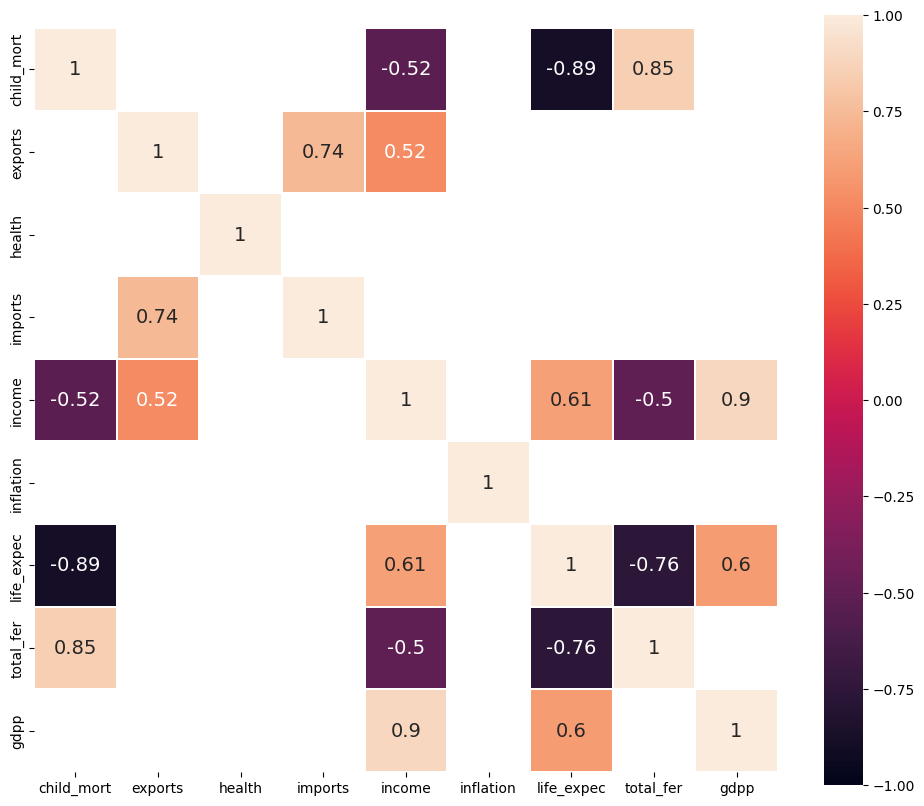

In [327]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr>=0.5) | (corr <= -0.5)], vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size":14}, square=True)

# Learning Implementation
Pada learning process ini, terdapat 3 pilihan yang dapat digunakan. Yaitu KMeans, DBSCAN, dan Hierarchical. Pada studi kasus ini, akan menggunakan **KMeans** sebagai implementasinya.

## KMeans

In [328]:
# generate random centroid
def random_centroids(df, k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [329]:
initial_centroids = random_centroids(df_scaling, 3)
initial_centroids

,0,1,2
child_mort,0.016553,0.381694,0.289192
exports,0.256595,0.321130,0.262098
health,0.313238,0.182722,0.236172
imports,0.119782,0.208896,0.275013
income,0.495944,0.071235,0.180809
inflation,0.121893,0.124388,0.041854
life_expec,0.840237,0.881657,0.950690
total_fer,0.041009,0.272871,0.695584
gdpp,0.112333,0.029388,0.438765


In [330]:
def labeling(df, centroid):
    distance = centroid.apply(lambda x : np.sqrt(((df - x) ** 2).sum(axis = 1)))
    return distance.idxmin(axis = 1)

In [331]:
def new_centroid(df, label):
    return df.groupby(label).apply(lambda x : np.exp(np.log(x).mean())).T
     

In [332]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iterasi {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [333]:
def KMeans(k, df, initial_centroids):
    new_df = df.copy()
    max_iteration = 100
    current_iteration = 1
    centroids = initial_centroids
    old_centroid = pd.DataFrame()
    last_label = pd.DataFrame()
    while current_iteration <= max_iteration and not centroids.equals(old_centroid):
        old_centroid = centroids
        label = labeling(new_df, centroids)
        centroids = new_centroid(new_df, label)
        plot_clusters(new_df, label, centroids, current_iteration)
        last_label = label
        current_iteration += 1
    print("old centroid", old_centroid)
    print("current centroid", centroids)
    new_df['label'] = last_label
    return new_df


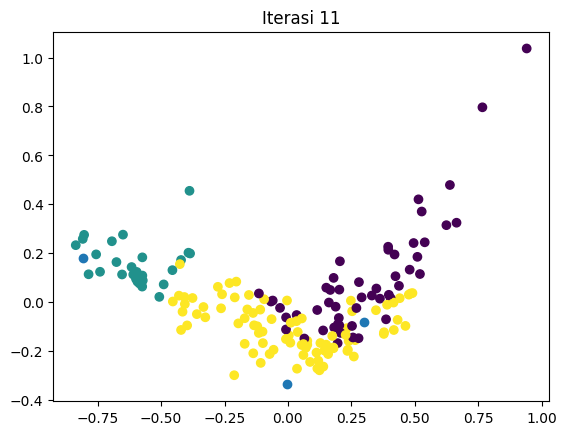

old centroid                    0         1         2
child_mort  0.000000  0.509811  0.080113
exports     0.306781  0.128474  0.000000
health      0.000000  0.249993  0.269176
imports     0.337550  0.236872  0.000000
income      0.180619  0.000000  0.061594
inflation   0.000000  0.118921  0.096847
life_expec  0.866907  0.000000  0.770357
total_fer   0.000000  0.670036  0.183691
gdpp        0.133826  0.000000  0.039627
current centroid                    0         1         2
child_mort  0.000000  0.509811  0.080113
exports     0.306781  0.128474  0.000000
health      0.000000  0.249993  0.269176
imports     0.337550  0.236872  0.000000
income      0.180619  0.000000  0.061594
inflation   0.000000  0.118921  0.096847
life_expec  0.866907  0.000000  0.770357
total_fer   0.000000  0.670036  0.183691
gdpp        0.133826  0.000000  0.039627


In [334]:
df_scale_with_label = KMeans(3, df_scaling, initial_centroids)

In [335]:
df_scale_with_label

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,2
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,2
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,2
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,2
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,0
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,2


In [336]:
df_scale_with_label['country'] = df['country']
df_scale_with_label

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,country
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1,Afghanistan
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,2,Albania
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,2,Algeria
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1,Angola
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,2,Vanuatu
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,2,Venezuela
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,0,Vietnam
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,2,Yemen


# Evaluasi

In [337]:
from sklearn.cluster import KMeans 

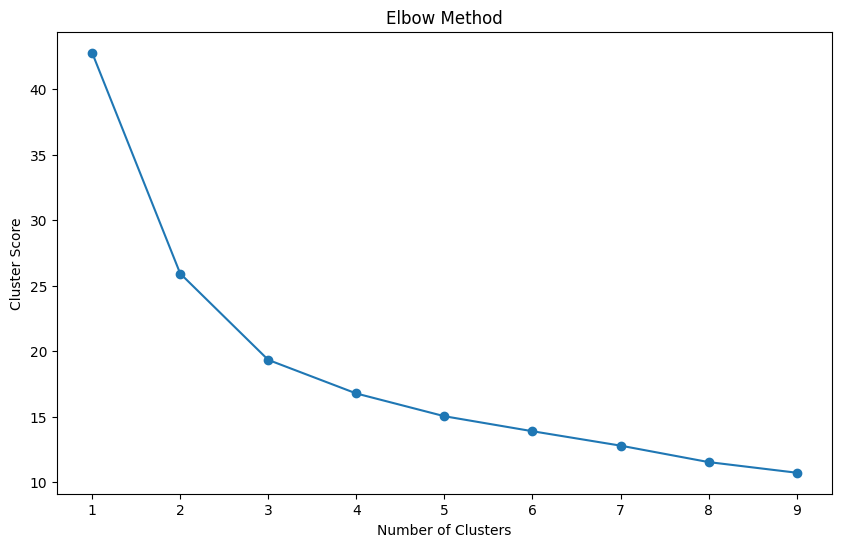

In [338]:
cluster_score = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(df_scaling)
    cluster_score.append(kmeans.inertia_) 
    
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), cluster_score, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Score')
plt.show()